# Clustering jerárquico
## Análisis "bottom-up" usando algoritmo del punto más lejano

In [1]:
# Importar librerías básicas
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.dpi'] = 80

In [8]:
# Generar un dataset aleatorio

# Semilla de aleatorios

# Variables
var=["X","Y","Z"]

# Etiquetas
tags=["ID_"+str(i) for i in range(0,5)]

# Generar muestras aleatorias continuas uniformes entre 0 y 10

X=np.random.sample([5,3])*10
# Contrucción del dataset
df=pd.DataFrame(X,columns=var,index=tags)


In [9]:
# Dataframe
df

,X,Y,Z
ID_0,5.620603,9.149612,2.621524
ID_1,0.428653,1.476120,3.012395
ID_2,0.331739,8.565801,8.044690
ID_3,3.108254,8.229564,5.868401
ID_4,1.359631,0.628700,1.071484


### Matriz de distancia

In [11]:
# Importar librería de distancias
from scipy.spatial.distance import pdist,squareform

# pdist -> Distancias por parejas entre observaciones en espacio n-dimensional.
# squareform -> Convierte un vector de distancia de forma vectorial en una matriz de distancia de forma cuadrada, y viceversa.

In [18]:
# Vector de distancias euclidianas
distVect=pdist(df,metric="euclidean")

# Los siguientes pasos sólo sirven para entender los resultados del vector de distancias
# Convertir en matriz cuadrada
distMat=squareform(distVect)

# Convertir en dataset de Pandas la matriz de distancias
dfVec=pd.DataFrame(distMat,columns=tags,index=tags)


In [19]:
# Mostrar
dfVec

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,9.273166,7.597608,4.207208,9.652173
ID_1,9.273166,0.000000,8.694651,7.806794,2.313434
ID_2,7.597608,8.694651,0.000000,3.543772,10.615071
ID_3,4.207208,7.806794,3.543772,0.000000,9.156485
ID_4,9.652173,2.313434,10.615071,9.156485,0.000000


### Matriz de enlaces

Se usa la matriz de distancias condesada (triangular superior), se podría usar la matriz redundante (completa), pero no se recomienda.

In [20]:
# Importar la librería
from scipy.cluster.hierarchy import linkage

In [21]:
# Clustering

clusters=linkage(distVect,method="complete")
# complete -> algoritmo del punto más lejano o algoritmo Voor Hees
# single -> algoritmo del punto más lejano
# centroid -> distancia entre los centroides

In [24]:
# Número de pasos
num_pasos=clusters.shape[0]

# Ver los resultados del agrupamiento en un dataframe de Pandas
pd.DataFrame(clusters,columns=["tag1","tag2","similitud","No. en cluster"],index=["step"+str(i) for i in range(1,num_pasos+1)])

,tag1,tag2,similitud,No. en cluster
step1,1.0,4.0,2.313434,2.0
step2,2.0,3.0,3.543772,2.0
step3,0.0,6.0,7.597608,3.0
step4,5.0,7.0,10.615071,5.0


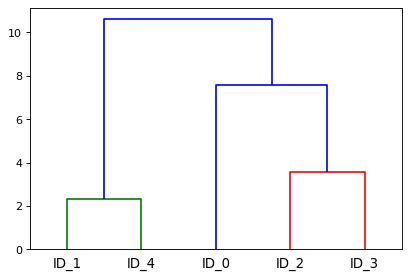

In [28]:
# Visualización en un dendograma
# Importar las librerías
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
# Dendograma
dendograma=dendrogram(clusters,labels=tags)

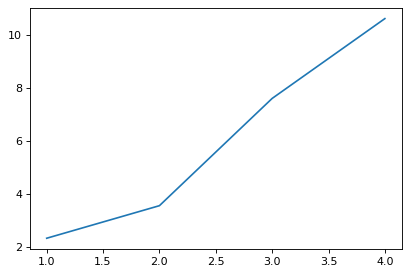

In [31]:
# Seleccionar el número de clusters
plt.plot([i+1 for i in range(num_pasos)],clusters[:,2])


## Clusterting aglomerativo usando Scikit Learn

In [33]:
# Importar la librería
from sklearn.cluster import AgglomerativeClustering

In [38]:
# Instanciar el modelo
aggcltr=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="complete")
aggcltr.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3)

In [39]:
# Predecir el cluster al que pertenece cada observación
Y = aggcltr.fit_predict(X)
print(Y)

[2 1 0 0 1]


### Métricas clustering

In [40]:
# Importar librería
from sklearn.metrics import silhouette_samples,silhouette_score

In [42]:
# Silueta promedio sobre todas las muestras
prom_sil= silhouette_score(X,Y)
prom_sil

0.434237163032282

In [43]:
# Silueta sobre cada muestra

sil_samples= silhouette_samples(X,Y)

for x,y in zip(tags,sil_samples):
    print(x,y)
# El método .zip empareja dos o más listas

ID_0 0.0
ID_1 0.7196083031636737
ID_2 0.5335673788179071
ID_3 0.15769026612549558
ID_4 0.7603198670543339


In [44]:
# Seleccionar el número de clusteres
sil=[]
for i in range(2,5):
    agg=AgglomerativeClustering(n_clusters=i,affinity="euclidean",linkage="complete")
    agy= agg.fit_predict(X)
    sil.append(silhouette_score(X,agy))

In [45]:
# Graficación
sil

[0.5674379281247478, 0.434237163032282, 0.2902017487901867]

In [48]:
# Asignar clúster
agg_final=AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="complete")
clusters_final= agg_final.fit_predict(X)
# Asignar al dataframe
df["Cluster"]=clusters_final

In [49]:
# Mostrar resultado
df

,X,Y,Z,Cluster
ID_0,5.620603,9.149612,2.621524,0
ID_1,0.428653,1.476120,3.012395,1
ID_2,0.331739,8.565801,8.044690,0
ID_3,3.108254,8.229564,5.868401,0
ID_4,1.359631,0.628700,1.071484,1
